In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for modelling
from sklearn import metrics, preprocessing,model_selection
from sklearn import neighbors

In [2]:
# reading data
df = pd.read_csv('data/nyc_taxi_trip_duration_processed.csv')

In [3]:
df.shape

(729322, 23)

In [4]:
df.head()

,id,passenger_count,trip_duration,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,...,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,id1080784,1,400,29,16,1.199073,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,id0889885,2,1100,11,23,4.129111,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,id0857912,2,1635,21,17,5.198374,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,id3744273,6,1141,5,9,2.361097,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,id0232939,1,848,17,6,4.328534,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [5]:
# Run  knn on a subset of data first, otherwise takes a v long time to finish
df_subset = df[:60000]
df_subset.shape

(60000, 23)

**seperating independent and dependent variables**

In [6]:
X = df_subset.drop(['id','trip_duration'], axis=1)
y = df_subset['trip_duration']
X.shape, y.shape

((60000, 21), (60000,))

In [7]:
### Scaling the data (Using MinMax Scaler)

scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)
X.head()

,passenger_count,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,...,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,0.166667,0.933333,0.695652,0.230663,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.333333,0.333333,1.000000,0.794308,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.333333,0.666667,0.739130,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.000000,0.133333,0.391304,0.454199,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.166667,0.533333,0.260870,0.832671,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# knn regresion


In [8]:
# Split the data into train and test
train_X,test_X,train_y,test_y = model_selection.train_test_split(X,y, random_state = 100)

In [9]:
def funcKNN(K):
    #initiating empty list
    test_err = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        print('Processing i:', i)
        knn = neighbors.KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_X, train_y)
        # predict on test
        test_yhat = knn.predict(test_X)
        #calculate MAE
        err = metrics.mean_absolute_error(test_y,test_yhat)
        # Appending err to list claculated using the predictions
        test_err.append(err)
        print('MAE value for k= ' , i , 'is:', err)
    
    return test_err

In [10]:
# define range
k = range(2, 26, 2)
# calling above defined function
test_err = funcKNN(k)

Processing i: 2
MAE value for k=  2 is: 520.8935333333334
Processing i: 4
MAE value for k=  4 is: 498.50305
Processing i: 6
MAE value for k=  6 is: 488.3452777777777
Processing i: 8
MAE value for k=  8 is: 485.28265
Processing i: 10
MAE value for k=  10 is: 518.3187933333334
Processing i: 12
MAE value for k=  12 is: 508.22416111111113
Processing i: 14
MAE value for k=  14 is: 511.72820476190475
Processing i: 16
MAE value for k=  16 is: 518.2763708333333
Processing i: 18
MAE value for k=  18 is: 519.2923259259259
Processing i: 20
MAE value for k=  20 is: 519.7059433333334
Processing i: 22
MAE value for k=  22 is: 526.9342757575757
Processing i: 24
MAE value for k=  24 is: 519.5607277777777


**The value of k changes depending on how many rows are taken for processing, so not a true representation here.**

For this set of data, the lowest k = 8

Minimum error:- 485.28265


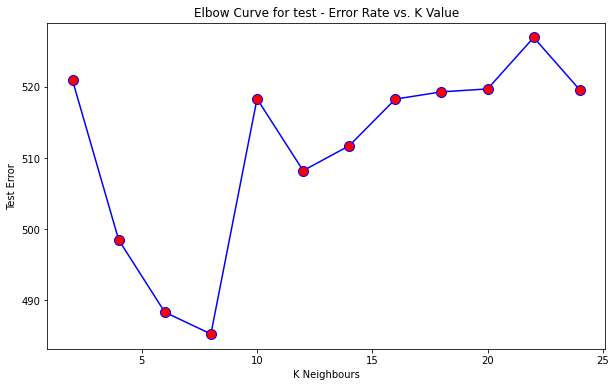

In [12]:
# plotting the Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(2,26,2),test_err,color='blue', linestyle='solid', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Elbow Curve for test - Error Rate vs. K Value')
plt.xlabel('K Neighbours')
plt.ylabel('Test Error')
print("Minimum error:-",min(test_err) ) #,"at K =",test_err.index(min(test_err)))

In [13]:
# Lets do k fold cross validation
from sklearn.model_selection import cross_val_score

In [14]:
# Creating instance of KNN
knn = neighbors.KNeighborsRegressor(n_neighbors = 8)

In [15]:
# #train model with cv of 5 
cv_scores = -cross_val_score(knn,X,y,cv = 5,scoring='neg_mean_absolute_error')
cv_scores

array([564.74757292, 665.67127083, 609.451625  , 517.59776042,
       550.87341667])

In [16]:
np.mean(cv_scores)

581.6683291666667

# Run with all data for 8 neighbours

In [19]:
#seperating independent and dependent variables

X = df.drop(['id','trip_duration'], axis=1)
y = df['trip_duration']

### Scaling the data (Using MinMax Scaler)

scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)
X.head()

,passenger_count,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,...,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,0.111111,0.933333,0.695652,0.230663,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.222222,0.333333,1.000000,0.794308,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.222222,0.666667,0.739130,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.666667,0.133333,0.391304,0.454199,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.111111,0.533333,0.260870,0.832671,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Split the data into train and test
train_X,test_X,train_y,test_y = model_selection.train_test_split(X,y, random_state = 100)

In [21]:
# 8 is  the lowest 
# Creating instance of KNN
knn = neighbors.KNeighborsRegressor(n_neighbors = 8)

# Fitting the model
knn.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=8)

In [22]:
# Predicting over the Train Set and calculating F1
yhat = knn.predict(test_X)
#k = mse(test_predict, test_y)
#err = mean_squared_error(test_y,yhat,squared=False)
err = metrics.mean_absolute_error(test_y,yhat)
print('Test MAE    ', err )

Test MAE     496.52030099105474
